In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib
import seaborn as sns

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Lien pour récupérer les données : https://www.kaggle.com/lukebm/forest-fires-in-brazil-adjusted

In [21]:
data = pd.read_csv('amazon.csv', encoding="utf-8", thousands = '.')
data.head()

,Unnamed: 0,year,state,month,number
0,0,1998,Acre,Janeiro,0
1,1,1999,Acre,Janeiro,0
2,2,2000,Acre,Janeiro,0
3,3,2001,Acre,Janeiro,0
4,4,2002,Acre,Janeiro,0


# Nettoyage des données

In [22]:
month_trad = {"Janeiro":"Janvier","Fevereiro":"Février","Março":"Mars","Abril":"Avril","Maio":"Mai","Junho":"Juin",
              "Julho":"Juillet","Agosto":"Aout","Setembro":"Septembre","Outubro":"Octobre","Novembro":"Novembre",
              "Dezembro":"Decembre"}
data['month']=data['month'].map(month_trad)

data.head()

,Unnamed: 0,year,state,month,number
0,0,1998,Acre,Janvier,0
1,1,1999,Acre,Janvier,0
2,2,2000,Acre,Janvier,0
3,3,2001,Acre,Janvier,0
4,4,2002,Acre,Janvier,0


# Analyse

### Jeu de données

In [23]:
print(color.BOLD + "Nombre de lignes : " + color.END + str(data.count()['year']))
print(color.BOLD + 'Etats présents dans le fichier : ' + color.END)
states = pd.unique(data['state'])
print(states)
print(color.BOLD + "Année allant de : " + color.END + str(data['year'].min())+" à "+str(data['year'].max()))

Nombre de lignes : 6454
Etats présents dans le fichier : 
['Acre' 'Alagoas' 'Amapá' 'Amazonas' 'Bahia' 'Ceará' 'Distrito Federal'
 'Espírito Santo' 'Goiás' 'Maranhão' 'Mato Grosso' 'Mato Grosso do Sul'
 'Minas Gerais' 'Pará' 'Paraíba' 'Paraná' 'Pernambuco' 'Piauí'
 'Rio de Janeiro' 'Rio Grande do Norte' 'Rio Grande do Sul' 'Rondônia'
 'Roraima' 'Santa Catarina' 'São Paulo' 'Sergipe' 'Tocantins']
Année allant de : 1998 à 2017


### Evolution du nombre de feux à travers les années

In [24]:
nb_fires_per_year = data.groupby(['year']).sum().reset_index()

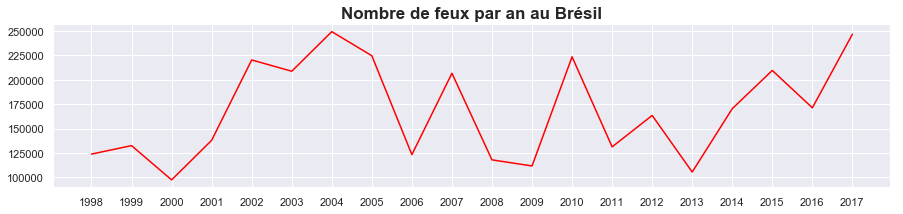

In [93]:
sns.set()
plt.figure(figsize=(15,3))
locator = matplotlib.ticker.MultipleLocator()
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
ax = sns.lineplot(x="year", y="number", data=nb_fires_per_year, color='Red')
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title("Nombre de feux par an au Brésil",fontdict={'fontsize': '17', 'fontweight' : 'bold'})
plt.savefig("output/fire_brazil.jpg", dpi=300)

## Evolution du nombre de feux par mois

In [89]:
nb_fires_per_month = data.groupby(['month']).sum().reindex(['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout',
                                                           'Septembre','Octobre','Novembre','Decembre']).reset_index()
nb_fires_per_month

,month,Unnamed: 0,year,number
0,Janvier,1683669,1086067,52587
1,Février,1694230,1084050,30952
2,Mars,1705030,1084050,35118
3,Avril,1715830,1084050,28364
4,Mai,1726630,1084050,46083
5,Juin,1737430,1084050,111405
6,Juillet,1748230,1084050,217620
7,Aout,1759030,1084050,740841
8,Septembre,1769830,1084050,1015925
9,Octobre,1780630,1084050,629665


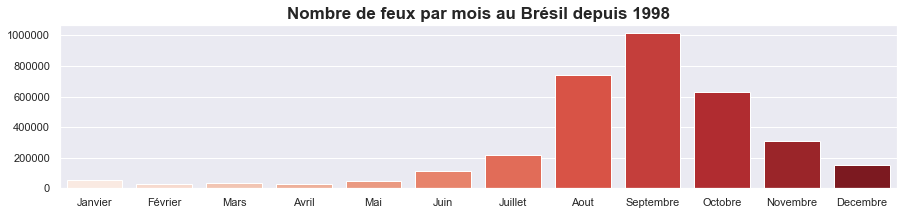

In [92]:
sns.set()
plt.figure(figsize=(15,3))

ax = sns.barplot(x="month", y="number", data=nb_fires_per_month,palette="Reds")
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title("Nombre de feux par mois au Brésil depuis 1998",fontdict={'fontsize': '17', 'fontweight' : 'bold'})
plt.savefig("output/fire_brazil_months.jpg", dpi=300)

## Evolution du nombre de feux par etat

In [44]:
nb_fires_per_year_and_state = data.groupby(['year','state']).sum()['number']
map_df = gpd.read_file('BRA_adm1.shp')

nb_fires_per_year_and_state

year  state         
1998  Acre                730
      Alagoas              86
      Amapá               278
      Amazonas            946
      Bahia              5907
                        ...  
2017  Roraima            1101
      Santa Catarina     2354
      Sergipe              75
      São Paulo          5406
      Tocantins         21129
Name: number, Length: 540, dtype: int64

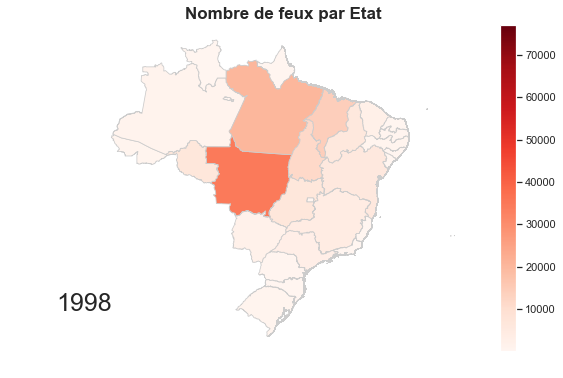

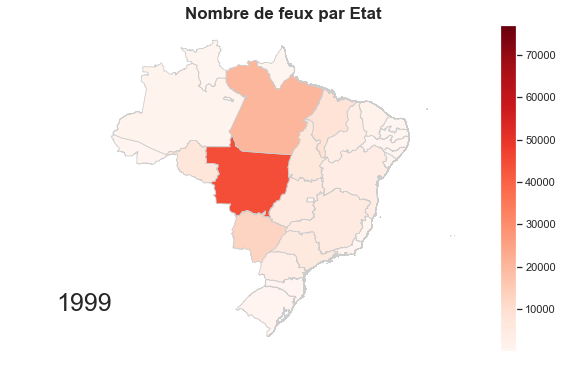

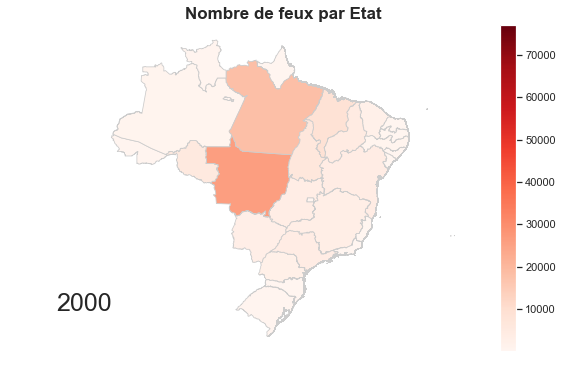

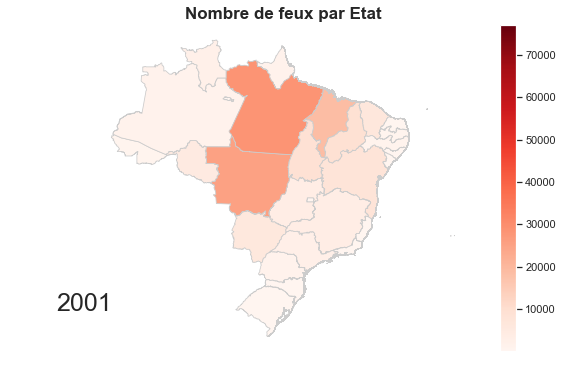

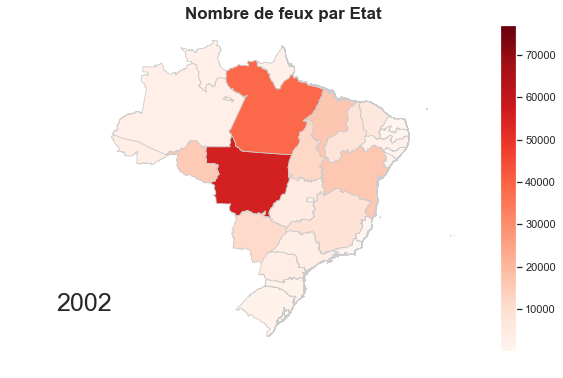

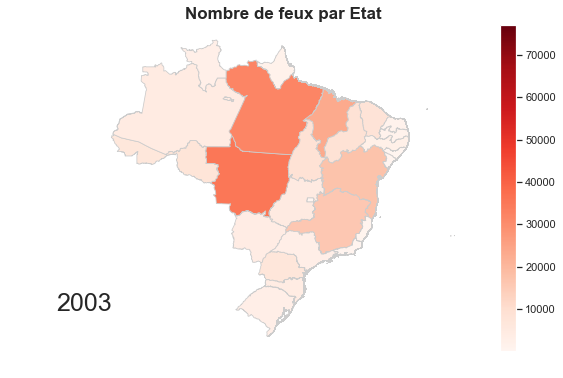

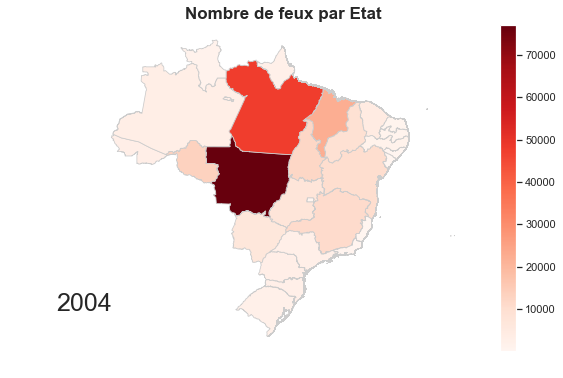

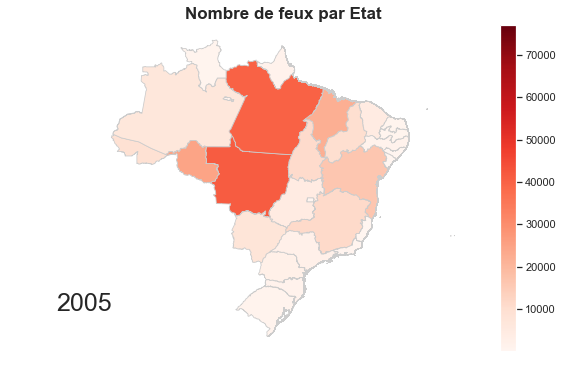

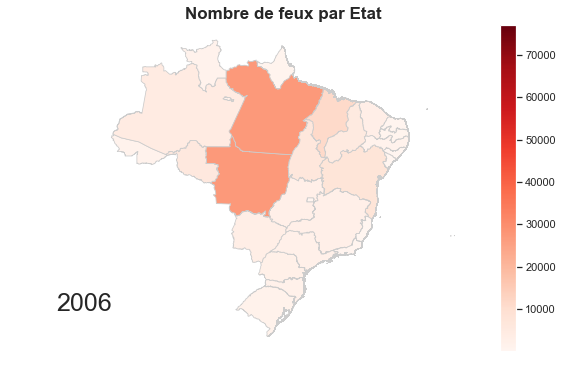

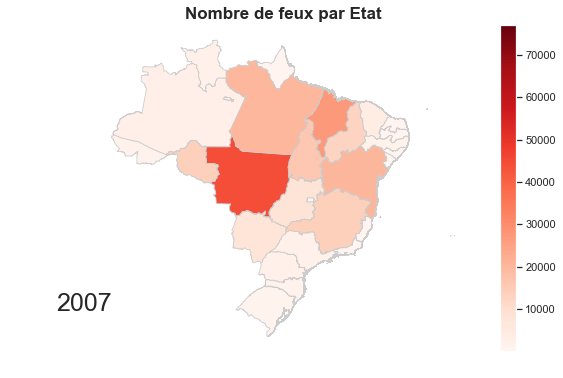

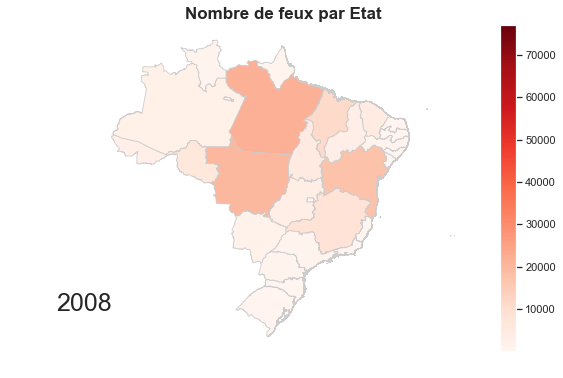

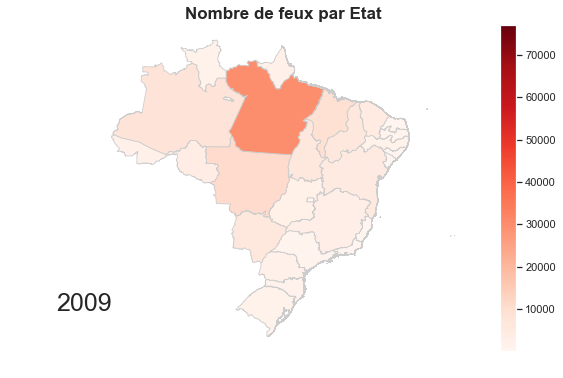

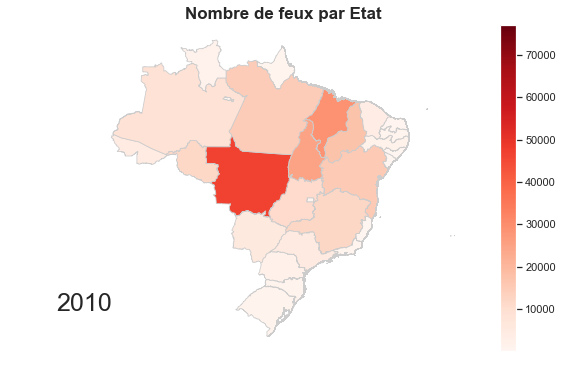

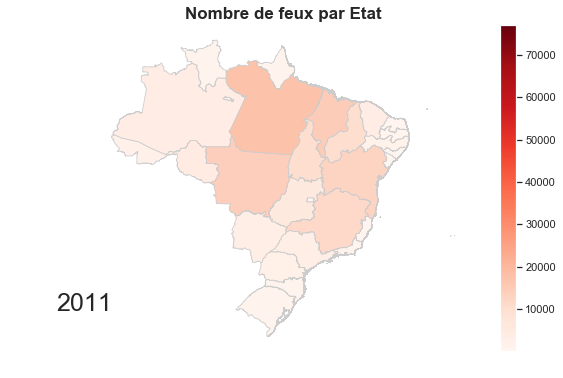

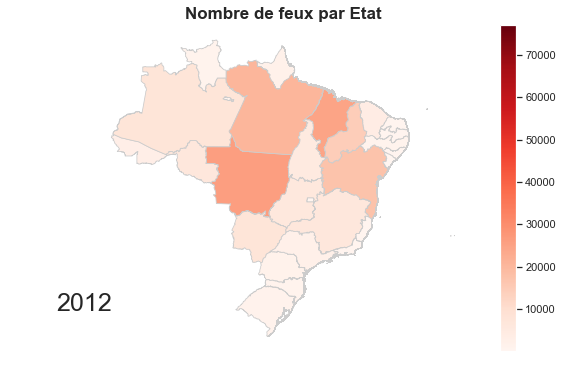

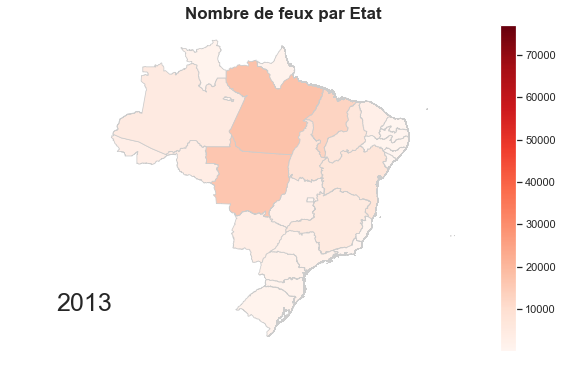

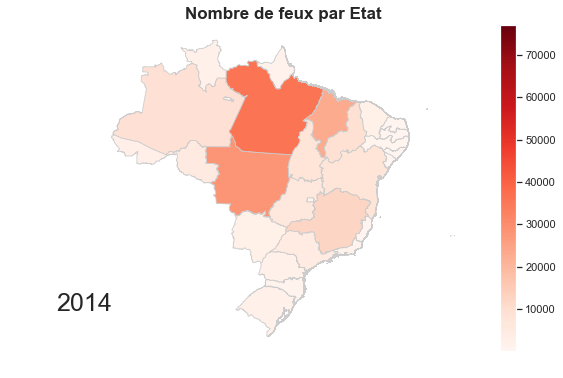

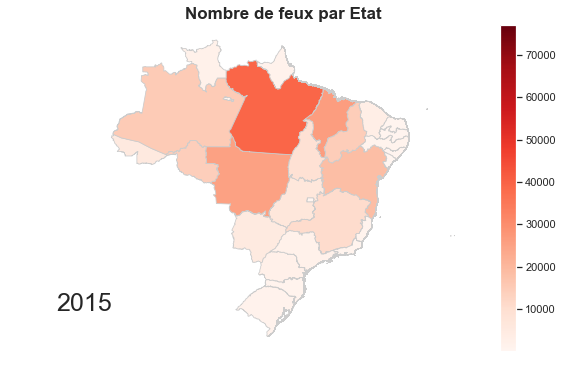

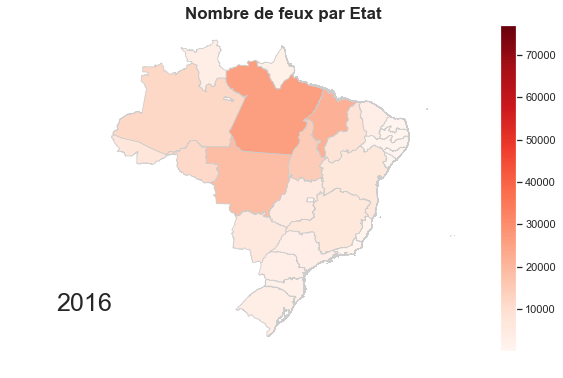

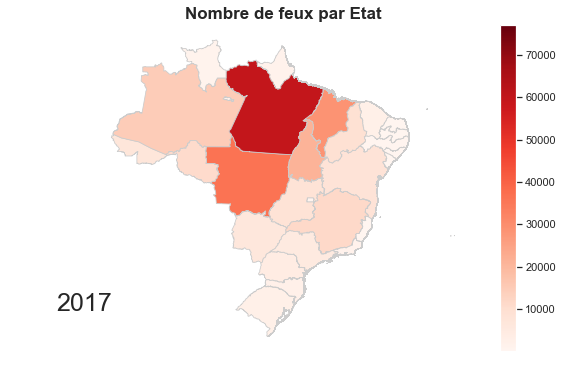

In [67]:
vmin, vmax = nb_fires_per_year_and_state.values.min(), nb_fires_per_year_and_state.values.max()

for year in range(1998,2018):
    fires_per_states = nb_fires_per_year_and_state[year]
    merged = map_df.set_index('NAME_1').join(fires_per_states)


    # Variable utilisé pour les valeurs de la map
    variable = 'number'

    # Création du graphique
    fig, ax = plt.subplots(1, figsize=(10, 6))
    ax.axis('off')
    ax.set_title('Nombre de feux par Etat', fontdict={'fontsize': '17', 'fontweight' : 'bold'})
    ax.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=25)
    merged.plot(column=variable, cmap='Reds', vmin=vmin, vmax=vmax, linewidth=0.8, ax=ax, edgecolor='0.8')
    
    # Ajout de la légende
    sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    fig.savefig("output/fire_states_"+str(year)+".jpg", dpi=300)

## Détails sur les Etats concernés par l'amazonie

In [79]:
evolution_nb_fire = pd.DataFrame(columns =['state','mean_3_first_years','mean_3_last_years','diff','diff_percentage'])
nb_fires_per_year_and_state = data.groupby(['state','year']).sum()
for state in states:
    init_val = int((nb_fires_per_year_and_state.loc[state,1998]['number']+nb_fires_per_year_and_state.loc[state,1999]['number']+nb_fires_per_year_and_state.loc[state,2000]['number'])/3)
    final_val = int((nb_fires_per_year_and_state.loc[state,2015]['number']+nb_fires_per_year_and_state.loc[state,2016]['number']+nb_fires_per_year_and_state.loc[state,2017]['number'])/3)
    evolution_nb_fire = evolution_nb_fire.append({'state':state,
                                                    'mean_3_first_years':init_val,
                                                    'mean_3_last_years':final_val,
                                                    'diff':final_val-init_val,
                                                    'diff_percentage':((final_val-init_val)/init_val)*100},
                                                    ignore_index=True)

evolution_nb_fire = evolution_nb_fire.set_index('state').loc[['Acre','Amazonas','Rondônia','Mato Grosso','Roraima','Pará',
                                                'Amapá','Maranhão','Tocantins']]
evolution_nb_fire

,mean_3_first_years,mean_3_last_years,diff,diff_percentage
state,,,,
Acre,499,6515,6016,1205.611222
Amazonas,953,13997,13044,1368.730325
Rondônia,6513,12365,5852,89.851067
Mato Grosso,35007,26908,-8099,-23.135373
Roraima,201,2220,2019,1004.477612
Pará,19656,41722,22066,112.260887
Amapá,210,1828,1618,770.476190
Maranhão,10643,25542,14899,139.988725
Tocantins,8252,15035,6783,82.198255


In [99]:
fires_states = nb_fires_per_year_and_state.reset_index()

few_fires_states = fires_states[fires_states['state'].isin(['Acre','Amazonas','Roraima','Amapá'])]
big_fires_states = fires_states[fires_states['state'].isin(['Rondônia','Mato Grosso','Pará','Maranhão','Tocantins'])]

Text(0.5,1,'Nombre de feux par an et par Etat au Brésil')

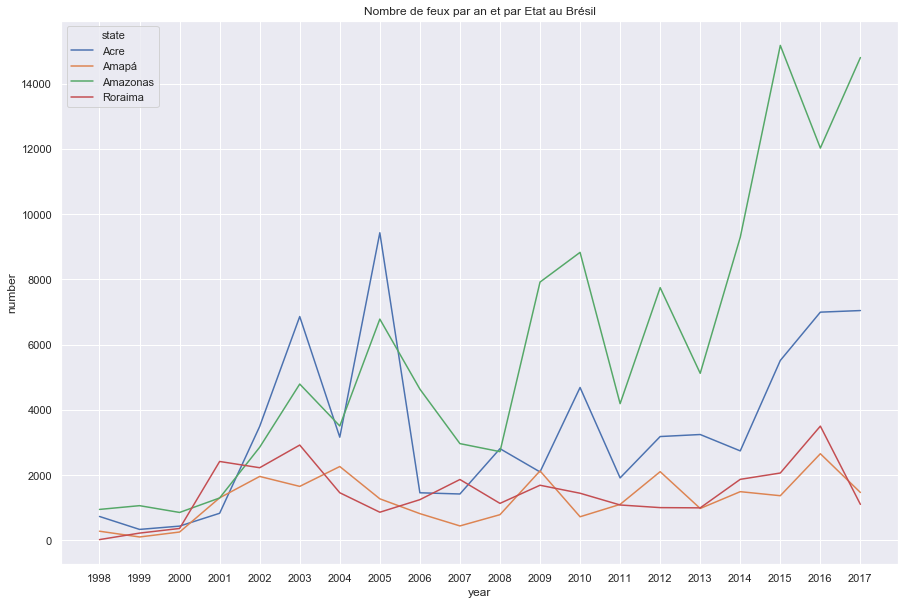

In [100]:
sns.set()
plt.figure(figsize=(15,10))
locator = matplotlib.ticker.MultipleLocator()
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
ax = sns.lineplot(x="year", y="number", hue="state", data=few_fires_states)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title("Nombre de feux par an et par Etat au Brésil",fontdict={'fontsize': '17', 'fontweight' : 'bold'})
plt.savefig("output/fire_brazil.jpg", dpi=300)


Text(0.5,1,'Nombre de feux par an et par Etat au Brésil')

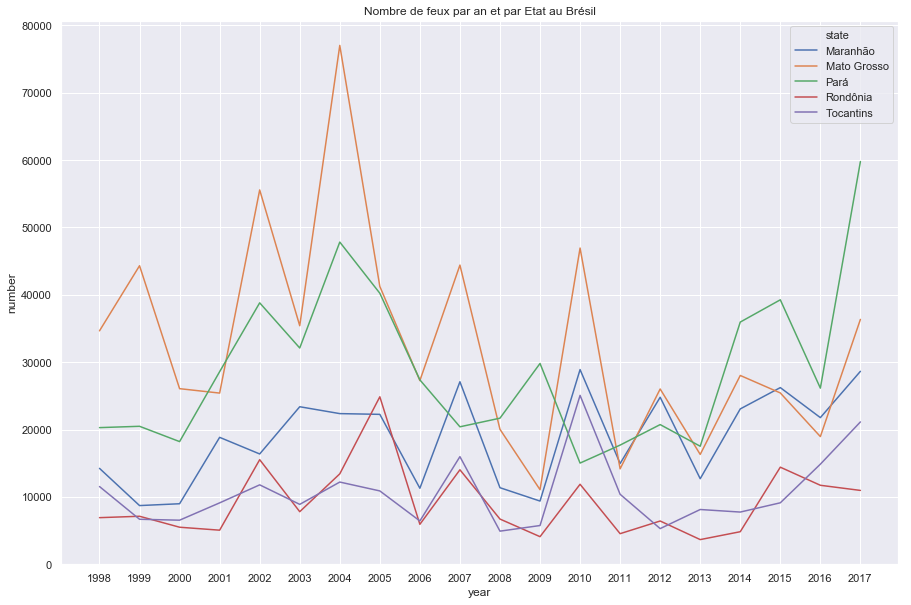

In [101]:
sns.set()
plt.figure(figsize=(15,10))
locator = matplotlib.ticker.MultipleLocator()
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
ax = sns.lineplot(x="year", y="number", hue="state", data=big_fires_states)
ax.set_title("Nombre de feux par an et par Etat au Brésil")
ax.set_ylabel('')    
ax.set_xlabel('')